# Ex02 - Histograma e Transformações de intensidade

Esta atividade tem 2 objetivos principais: 
    - entender o conceito de histograma e estatísticas da imagem
    - explorar várias formas de transformação de intensidade dos pixels. 

## Parte 1 - Histograma

Leia o notebook [Histograma de imagens](../ea979/master/05_Histograma_da_imagem.ipynb) para entender o conceito de histograma e o uso da função *np.histogram*. Veja também como é plotado o histograma usando gráfico de barras.

### Exercício 1.1

Vamos tentar calcular o histograma de uma imagem colorida. Use a imagem *versicolor.jpg* a seguir e plote o histograma de cada uma das bandas .

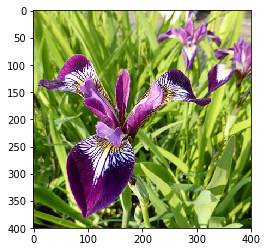

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

img = mpimg.imread('../figures/versicolor.jpg')
plt.imshow(img)

Para calcular o histograma da banda R de uma imagem colorida, basta usar a função np.histogram da biblioteca Numpy com f [: , : , 0], ao invés de f. f [: , : , 0] representa todas as linhas e colunas da fatia 0 (banda R).

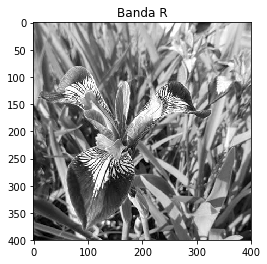

In [2]:
f = np.array(img)
plt.imshow(f[:,:,0], cmap='gray')         
plt.title('Banda R')

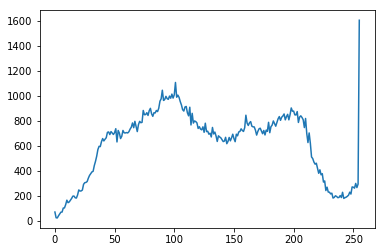

In [3]:
nbins = 256
hr, bin_edges = np.histogram(f[:,:,0], nbins,(0,255))
plt.plot(hr)

Esta forma de visualizar o histograma não é a mais recomendada, pois nos dá a ilusão do histograma ser uma variável contínua. O ideal é visualizar o histograma como um gráfico de barras.

Para isso, Vamos criar uma fução que possa ser usada mais vezes no notebook. No eixo das abscissas, queremos mostrar o valor do nível de cinza computado (bin center) e não os limites de cada faixa (bin edges), como o retornado pela função *np.histogram*. 

In [4]:
def plota_hist(h,cor):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w, color=cor)
    plt.title('Historama da imagem: %s bins' % (nbins))

Veja que o histograma com 256 fica um pouco poluído. Podemos variar o número de bins e ver qual a melhor visualização.

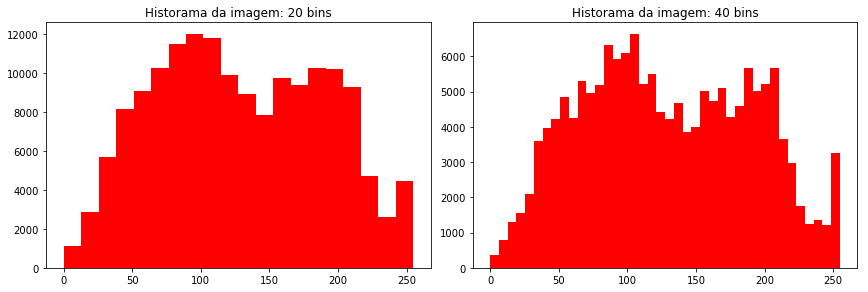

In [5]:
fig, axs = plt.subplots(1,2, figsize=(12, 4))
plt.tight_layout() 

plt.subplot(121)
nbins = 20
cor = 'r'
hr, bin_edges = np.histogram(f[:,:,0], nbins,(0,255))
plota_hist(hr,cor)

plt.subplot(122)
nbins = 40
hr, bin_edges = np.histogram(f[:,:,0], nbins,(0,255))
plota_hist(hr,cor)

Vamos agora visualizar os histogramas das 3 bandas. Apenas para efeito de ilustração, podemos visualizar as barras dos gráficos nas cores das respectivas bandas (como vimos nos slides de aula).

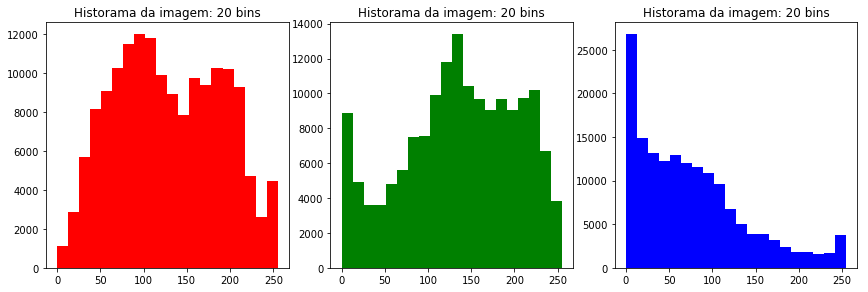

In [6]:
nbins = 20
cor1='r'
cor2='g'
cor3='b'

fig, axs = plt.subplots(1,3, figsize=(12, 4))
plt.tight_layout() 

plt.subplot(131)
hr, bin_edges = np.histogram(f[:,:,0], nbins,(0,255))
plota_hist(hr,cor1)

plt.subplot(132)
hg, bin_edges = np.histogram(f[:,:,1], nbins,(0,255))
plota_hist(hg,cor2)

plt.subplot(133)
hb, bin_edges = np.histogram(f[:,:,2], nbins,(0,255))
plota_hist(hb,cor3)

### Exercício 1.2

Usando a mesma imagem colorida do item anterior, converta a imagem para níveis de cinza, usando algum dos métodos abaixo:
   - convert(L) do PIL;
   - médias das bandas R, G, B;
   - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;

Em seguida, calcule o histograma da imagem convertida para níveis de cinza. Compare com os histogramas coloridos e comente.   

Vamos usar o método de média ponderada das bandas R, G e B para converter a imagem para níveis de cinza. A ponderação mais comum é: (0.3 * R) + (0.59 * G) + (0.11 * B).

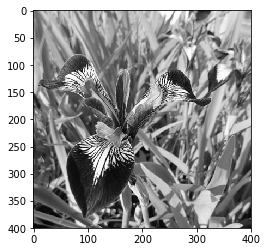

In [7]:
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2])
plt.imshow(f_gray, cmap='gray')

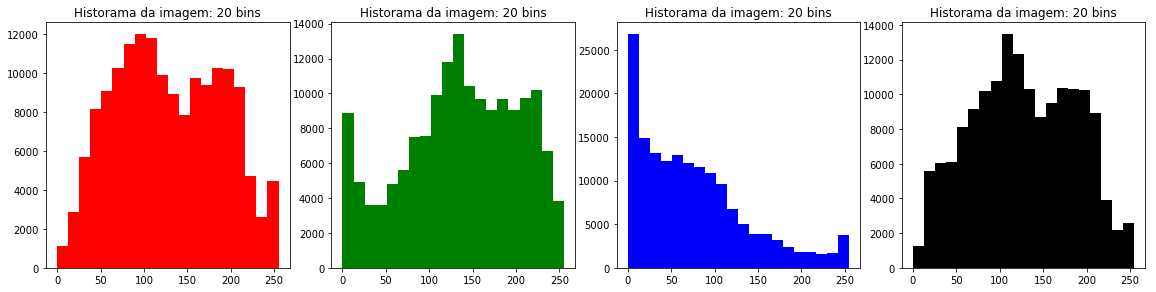

In [8]:
nbins = 20
cor1='r'
cor2='g'
cor3='b'
cor4='k'

fig, axs = plt.subplots(1,4, figsize=(16, 4))
plt.tight_layout() 

plt.subplot(141)
hr, bin_edges = np.histogram(f[:,:,0], nbins,(0,255))
plota_hist(hr,cor1)

plt.subplot(142)
hg, bin_edges = np.histogram(f[:,:,1], nbins,(0,255))
plota_hist(hg,cor2)

plt.subplot(143)
hb, bin_edges = np.histogram(f[:,:,2], nbins,(0,255))
plota_hist(hb,cor3)

plt.subplot(144)
hgray, bin_edges = np.histogram(f_gray, nbins,(0,255))
plota_hist(hgray,cor4)


Podemos perceber que o histograma da imagem convertida para níveis de cinza se aproxima mais dos histogramas vermelho e verde e menos do azul. Isso poderia ser interpretado como uma decorrência da ponderação, que dá muito menos peso para a banda azul. Para verificar se isso é verdade, vamos verificar como ficam os histogramas fazendo a média simples entre as bandas.

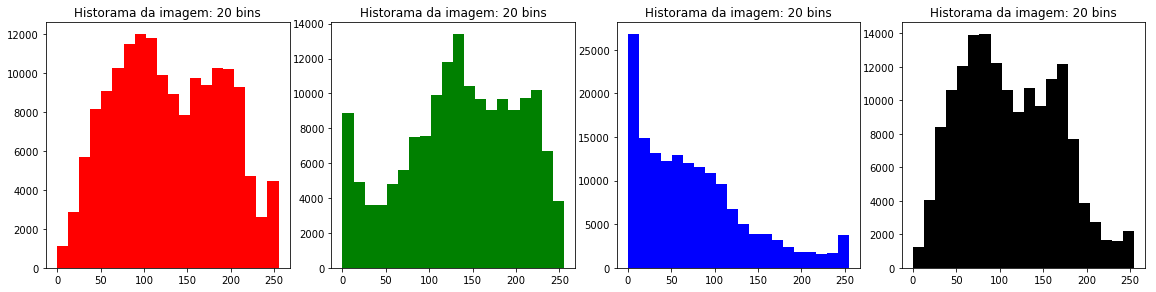

In [9]:
f_gray2 = np.uint8(0.33*f[:,:,0]+0.33*f[:,:,1]+0.33*f[:,:,2])

nbins = 20
cor1='r'
cor2='g'
cor3='b'
cor4='k'

fig, axs = plt.subplots(1,4, figsize=(16, 4))
plt.tight_layout() 

plt.subplot(141)
hr, bin_edges = np.histogram(f[:,:,0], nbins,(0,255))
plota_hist(hr,cor1)

plt.subplot(142)
hg, bin_edges = np.histogram(f[:,:,1], nbins,(0,255))
plota_hist(hg,cor2)

plt.subplot(143)
hb, bin_edges = np.histogram(f[:,:,2], nbins,(0,255))
plota_hist(hb,cor3)

plt.subplot(144)
hgray2, bin_edges = np.histogram(f_gray2, nbins,(0,255))
plota_hist(hgray2,cor4)

Para efeito de comparação, lançar mão do gráfico contínuo pode ser interessante.

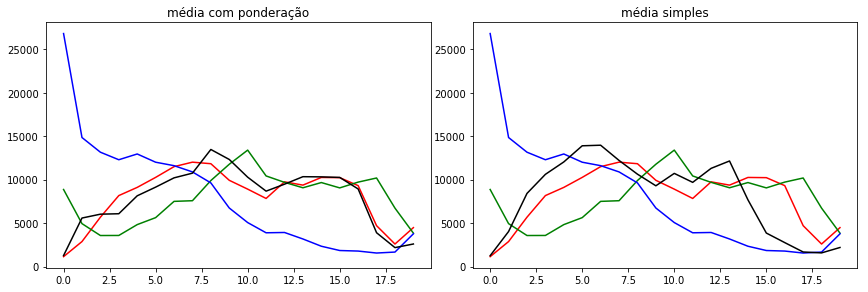

In [10]:
fig, axs = plt.subplots(1,2, figsize=(12, 4))
plt.tight_layout() 

plt.subplot(121)
plt.plot(hr,'r')
plt.plot(hg,'g')
plt.plot(hb,'b')
plt.plot(hgray,'k')
plt.title('média com ponderação')

plt.subplot(122)
plt.plot(hr,'r')
plt.plot(hg,'g')
plt.plot(hb,'b')
plt.plot(hgray2,'k')
plt.title('média simples')


## Parte 2 - Transformação de Intensidade

É a categoria de funções que apenas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Estudem atentamente os tutoriais sobre Transformada de intensidade e sobre Equalização de histograma. O último tutorial mostra que é possível fazer a equalização da imagem utilizando também o conceito usado para construir um mosaico com tons de cinza igualmente distribuídos. 


### Exercício 2.1
Veja a imagem abaixo. Escolha um valor de limiar (threshold) para separar as bolachas do fundo da imagem. Dica: Visualize o histograma da imagem para escolher o valor. Crie primeiro uma função de transformação T e depois aplique esta transformação para obter o objeto de interesse (cookies) pintados de branco e o fundo em preto.

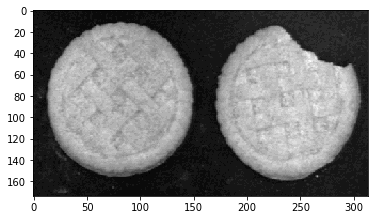

In [11]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
g = mpimg.imread('../figures/cookies.pgm')  
plt.imshow(g,cmap='gray')

Como explicado, a operação de limiarização é simples. definimos um valor limiar e transformamos a imagem original usando a seguinte regra: se f(x,y) =< Limiar -> g(x,y) = 0 e se f(x,y) > Limiar -> g(x,y) = 255. A grande dificuldade é encontrar um valor de limiar adequado para, neste caso, separar os biscoitos do fundo. Vamos usar a dica e tentar encontrar este valor à partir do histograma.

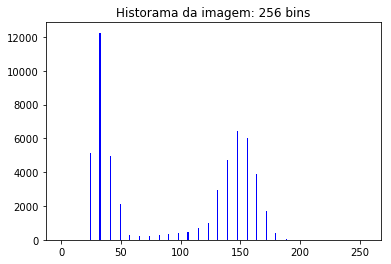

In [12]:
nbins = 256
cor = 'b'
h, bin_edges = np.histogram(g, nbins,(0,255))
plota_hist(h,cor)

Os biscoitos claros no fundo escuro nos leva a interpretar o histograma da seguinte forma: o pico em torno do valor 30 representa os pixels do fundo e o pico em torno de 150 representa os biscoitos. Para separá-los, o ideal é escolher o valor entre 30 e 150 que possui o menor número de pixels. Posso calcular este valor exatamente ou chutar um valor aproximado.

Depois de encontrar este valor, basta aplicar a transformação. Primeiro criamos a tabela geral T (vetor que vai de 0 a 255) e depois alteramos este vetor, fazendo com que os elementos abaixo do limiar sejam todos 0 (False) e os acima do limiar sejam todos 1 (True).

bool


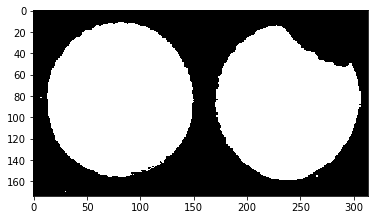

In [13]:
T = np.arange(256).astype('uint8') # vetor 0 a 255, como base da tabela de transformação
T_Limiar = (T > 70) # cria a tabela para a transformação com threshold 70, menor=False e maior=True
g1 = T_Limiar[g]
print(g1.dtype)
plt.imshow(g1, cmap='gray')

Veja que a imagem é booleana, já que aplicamos uma transformação booleana. Podemos mudar a tabela de  transformação, multiplicando por 255.

uint8


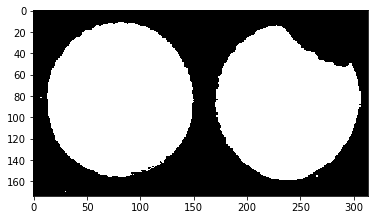

In [14]:
T = np.arange(256).astype('uint8') # vetor 0 a 255, como base da tabela de transformação
T_Limiar2 = np.uint8(255*(T > 70)) # cria a tabela para a transformação com threshold 70, menor=0 e maior=255
g2 = T_Limiar2[g]
print(g2.dtype)
plt.imshow(g2, cmap='gray')

### Exercício 2.2
Você é capaz de transformar a imagem para identificar o número da placa do carro apresentado na imagem abaixo? 

float32


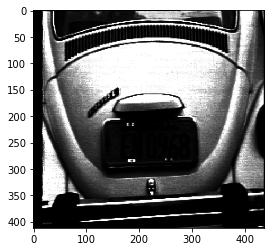

In [15]:
carro = mpimg.imread('../figures/fusca.png')  
plt.imshow(carro,cmap='gray')
print(carro.dtype)

Existem várias possíveis soluções. De alguma forma, é preciso transformar os níveis de cinza de tal maneira que os pixels dos números da placa, que parecem bem escuros, se destaquem dos da placa, que também são bem escuros.

### Solução 1

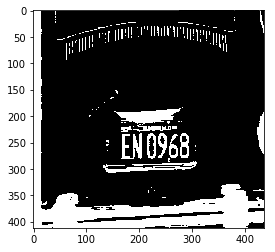

In [16]:
s = (255*carro).astype('uint8')
T = np.arange(256).astype('uint8') # vetor 0 a 255, como base da tabela de transformação
T1 = (T < 1)
s1 = T1[s]
plt.imshow(s1, cmap='gray')

### Solução 2 - negando a imagem e escolhendo um limiar bem alto

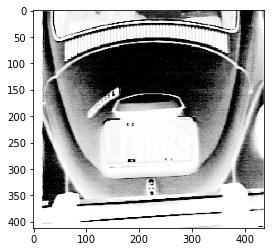

In [17]:
T2 = 255 - T
s_neg = T2[s]
plt.imshow(s_neg, cmap='gray')

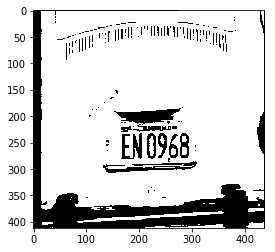

In [18]:
T3 = (T < 255)
s3 = T3[s_neg]
plt.imshow(s3, cmap='gray')

### Solução 3 - Transformação logaritmica - ressalta as partes escuras de uma imagem

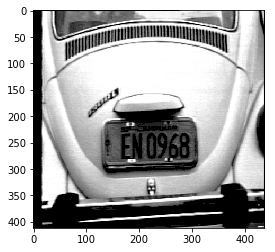

In [19]:
T4 = (np.log(T+1.)) # logaritmica - realce partes escuras
s4 = T4[s]
plt.imshow(s4, cmap='gray')